# Package installation

In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Data Set

In [2]:
SAVEE = "C:/Users/User/Desktop/bits/project/speech emotion audio files/SAVE/ALL/"
RAV ="C:/Users/User/Desktop/bits/project/speech emotion audio files/RAV/"

In [3]:

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)
        
        


## RAV Dataset

In [4]:
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_angry          96
female_fear         96
female_angry        96
male_fear           96
female_happy        96
male_sad            96
male_disgust        96
female_surprise     96
male_happy          96
male_surprise       96
female_disgust      96
female_sad          96
Name: labels, dtype: int64

In [5]:
 #Source - RAVDESS; Gender - Female; Emotion - Fear
path = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

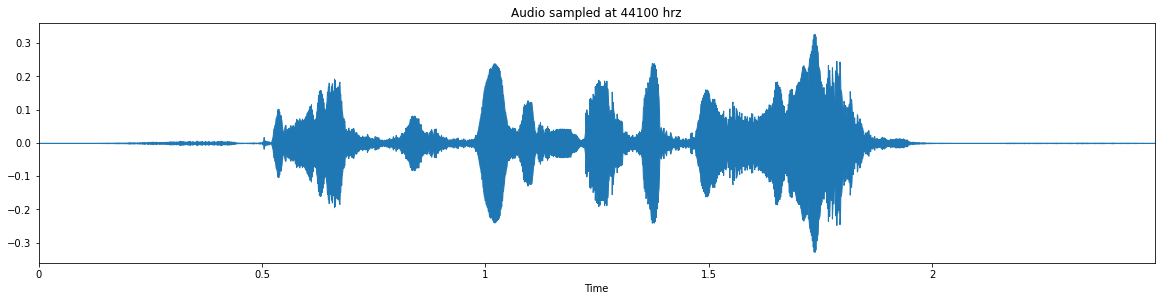

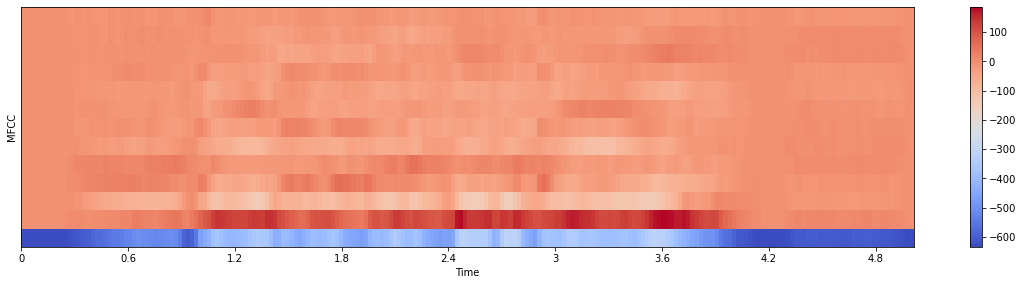

In [6]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

In [7]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path_h= RAV + 'Actor_11/03-01-03-01-02-02-11.wav'
X, sample_rate = librosa.load(path_h, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


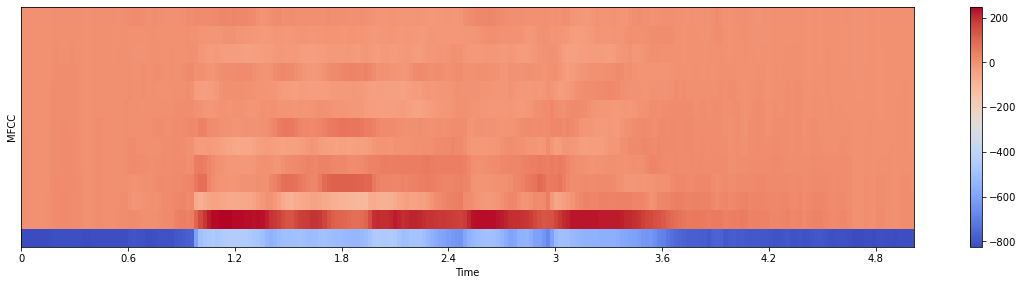

In [8]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path_h)


In [9]:
path_f = RAV + "Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path_f, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path_m = RAV +"Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path_m, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


## SAVEE dataset

In [10]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)


In [11]:
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
male_disgust      60
Name: labels, dtype: int64

In [12]:
path_s = SAVEE +'DC_f11.wav'
X, sample_rate = librosa.load(path_s, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


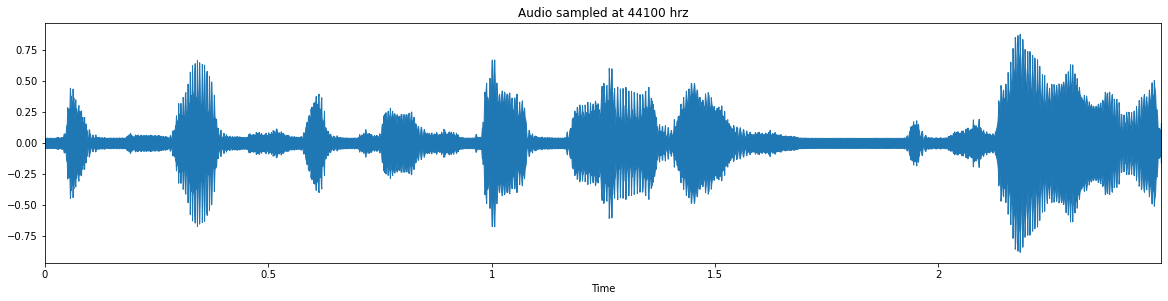

In [13]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path_s)

In [14]:
path_sh = SAVEE +'DC_h11.wav'
X, sample_rate = librosa.load(path_sh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
 

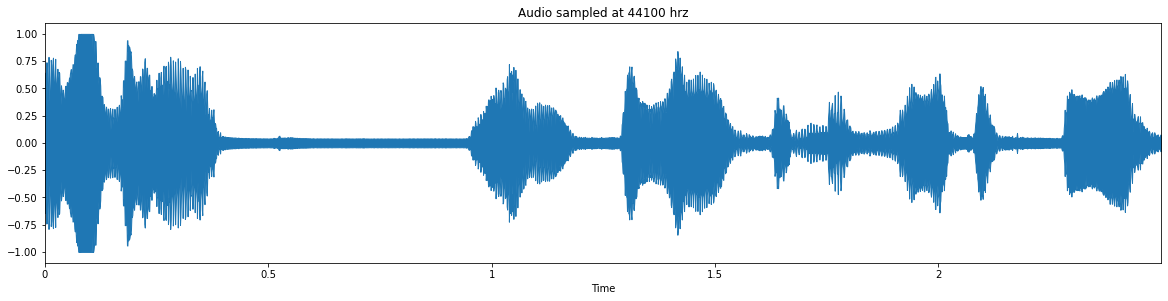

In [15]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path_sh)

In [16]:
df = pd.concat([SAVEE_df, RAV_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path1.csv",index=False)

male_neutral       264
male_angry         156
male_fear          156
male_sad           156
male_disgust       156
male_happy         156
male_surprise      156
female_neutral     144
female_fear         96
female_angry        96
female_happy        96
female_surprise     96
female_disgust      96
female_sad          96
Name: labels, dtype: int64


In [17]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import TimeDistributed, LSTM, ConvLSTM2D
from tensorflow.keras import layers

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd

In [18]:
from tensorflow.keras.utils import to_categorical

## Dataset Combining

In [19]:
ref = pd.read_csv("C:/Users/User/Desktop/bits/project/final test/Data_path1.csv")
ref.head()

labels source                                               path
0  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...
1  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...
2  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...
3  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...
4  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...

## Feature Extraction

In [20]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

1920


feature
0  [-11.113933, -7.215756, -6.21919, -5.9265423, ...
1  [-24.449831, -22.465742, -22.928043, -23.24380...
2  [-25.000114, -24.520256, -24.178183, -23.84745...
3  [-1.529839, -4.333437, -12.285238, -13.083024,...
4  [-22.458635, -22.467834, -25.884357, -27.82704...

In [21]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                               path  \
0  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...   
1  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...   
2  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...   
3  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...   
4  male_angry  SAVEE  C:/Users/User/Desktop/bits/project/speech emot...   

           0          1          2          3          4          5  \
0 -11.113933  -7.215756  -6.219190  -5.926542  -5.850419  -4.808960   
1 -24.449831 -22.465742 -22.928043 -23.243807 -22.926605 -23.432241   
2 -25.000114 -24.520256 -24.178183 -23.847450 -15.182783 -10.732485   
3  -1.529839  -4.333437 -12.285238 -13.083024 -12.041327 -11.819768   
4 -22.458635 -22.467834 -25.884357 -27.827044 -27.593534 -26.666508   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234095  -5.310307   
1 -14.830004  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   
2  -8.681472  ...        NaN        NaN        NaN        NaN        NaN   
3  -9.414148  ...        NaN        NaN        NaN        NaN        NaN   
4 -18.659023  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621666  -6.072197  -6.611348  -2.509089   1.964608  
1 -22.895985 -23.511503 -24.342152 -24.530262 -25.457796  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4 -23.281618 -24.167494 -25.228062 -25.902941 -25.589964  

[5 rows x 219 columns]

## Preprocessing

In [ ]:
df=df.fillna(0)
print(df.shape)
df[:5]

## Train and Test 

In [23]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.2
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
1557 -60.297245 -60.297245 -60.297245 -60.297245 -60.297245 -60.297245   
1701 -58.924797 -60.993488 -66.646667 -65.906052 -62.264805 -61.728050   
1022 -50.107021 -47.564384 -47.555668 -49.755825 -49.062851 -48.615200   
1394 -52.900173 -52.822117 -52.397060 -52.346714 -52.699764 -52.671467   
405  -16.630131 -18.128063 -22.425585 -23.455980 -25.459324 -26.608212   
651  -52.029594 -51.959499 -52.545200 -54.121338 -51.100746 -50.539547   
1096 -48.419827 -48.523376 -48.933453 -48.490391 -49.483562 -49.126469   
309  -23.552427 -22.695812 -10.607899  -3.628489  -2.357071  -2.730325   
226  -27.504190 -27.453255 -27.221724 -25.316860 -22.780470 -22.947187   
1634 -57.179878 -58.847603 -59.866753 -60.118149 -60.156803 -60.958305   

            6          7          8          9    ...        206        207  \
1557 -60.297245 -60.297245 -60.297245 -60.297245  ... -59.276894 -59.917194   
1701 -62.220459 -66.487862 -66.374069 -59.295303  ... -37.950077 -42.264507   
1022 -49.874905 -50.604305 -50.441830 -50.411678  ... -41.173672 -42.288372   
1394 -52.916019 -53.679375 -53.256329 -53.326431  ... -46.322445 -48.518387   
405  -29.364145 -30.062263 -29.137520 -28.316921  ... -27.541185 -25.622807   
651  -52.662663 -49.428677 -47.137337 -48.998230  ... -28.537596 -27.598995   
1096 -49.507149 -50.532600 -48.247765 -47.784065  ... -26.546970 -26.009083   
309   -2.662839  -1.454552  -0.942567  -1.160610  ...  -8.850004  -8.500657   
226  -22.650169 -22.132626 -22.999142 -22.690113  ... -22.966978 -21.947182   
1634 -62.416931 -62.439651 -62.012009 -61.938320  ... -60.163082 -60.583115   

            208        209        210        211        212        213  \
1557 -60.068626 -59.560112 -60.246170 -60.343796 -60.179958 -60.407856   
1701 -44.097836 -39.001663 -32.564980 -31.311375 -29.243635 -27.497892   
1022 -42.716427 -43.281235 -43.536053 -43.394901 -44.118851 -47.753983   
1394 -51.017273 -53.263401 -50.847923 -51.103653 -53.101326 -53.589024   
405  -25.382181 -25.306181 -23.671017 -23.371763 -24.034941 -23.577168   
651  -28.794193 -30.067226 -32.544804 -34.476635 -35.912453 -36.928596   
1096 -24.909212 -23.641085 -22.667072 -22.717587 -23.632301 -23.081896   
309   -8.117184  -8.510022 -10.123488 -14.074220 -15.872834 -17.316954   
226  -22.793785 -22.048553 -21.263027 -21.956982 -24.069176 -25.422636   
1634 -61.001690 -59.501247 -57.083633 -59.726463 -61.179287 -62.268040   

            214        215  
1557 -60.297245 -60.297245  
1701 -27.251892 -25.132702  
1022 -50.587345 -50.020237  
1394 -53.486084 -53.002754  
405  -20.271578 -17.548586  
651  -37.689342 -37.069138  
1096 -23.063042 -21.715858  
309  -17.683519 -19.257982  
226  -26.622854 -26.917145  
1634 -61.624374 -59.491783  

[10 rows x 216 columns]

In [24]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
1557 -0.746694 -0.766494 -0.772081 -0.768690 -0.769455 -0.773610 -0.774540   
1701 -0.668370 -0.806575 -1.145920 -1.094487 -0.882129 -0.854839 -0.882668   
1022 -0.165150 -0.033501 -0.021886 -0.156375 -0.126108 -0.110402 -0.188574   
1394 -0.324552 -0.336173 -0.306936 -0.306871 -0.334379 -0.340682 -0.359552   
405   1.745339  1.661060  1.457715  1.371294  1.225567  1.138971  0.964586   
651  -0.274869 -0.286515 -0.315658 -0.409952 -0.242810 -0.219650 -0.345308   
1096 -0.068863 -0.088708 -0.103007 -0.082870 -0.150201 -0.139427 -0.167898   
309   1.350291  1.398108  2.153513  2.523006  2.548536  2.494558  2.465791   
226   1.124768  1.124236  1.175329  1.263202  1.378974  1.346813  1.342060   
1634 -0.568790 -0.683043 -0.746734 -0.758287 -0.761412 -0.811140 -0.893714   

           7         8         9    ...       206       207       208  \
1557 -0.771896 -0.775995 -0.779106  ... -1.176542 -1.197616 -1.192009   
1701 -1.117389 -1.115411 -0.723256  ...  0.025993 -0.206882 -0.301041   
1022 -0.230942 -0.225528 -0.228066  ... -0.155773 -0.208222 -0.223976   
1394 -0.402558 -0.382730 -0.390540  ... -0.446092 -0.557873 -0.687058   
405   0.915491  0.964407  1.003536  ...  0.612909  0.727111  0.743056   
651  -0.165331 -0.040959 -0.149278  ...  0.556725  0.616200  0.552709   
1096 -0.226940 -0.102981 -0.081598  ...  0.668969  0.705432  0.769442   
309   2.512062  2.539214  2.517278  ...  1.666831  1.688069  1.706225   
226   1.358037  1.307261  1.317184  ...  0.870830  0.933401  0.887456   
1634 -0.891462 -0.871772 -0.870582  ... -1.226510 -1.234990 -1.244062   

           209       210       211       212       213       214       215  
1557 -1.148146 -1.175271 -1.168393 -1.139155 -1.131291 -1.121463 -1.093681  
1701 -0.006207  0.354814  0.431022  0.549019  0.650647  0.597349  0.638923  
1022 -0.243920 -0.251615 -0.234667 -0.262711 -0.446136 -0.616415 -0.587319  
1394 -0.798389 -0.655781 -0.659347 -0.752879 -0.762079 -0.767189 -0.734272  
405   0.754522  0.846430  0.868421  0.833254  0.862937  0.960421  1.012603  
651   0.490065  0.355929  0.256646  0.185106  0.140013  0.054458  0.050799  
1096  0.847011  0.901923  0.904460  0.855225  0.889754  0.815227  0.807276  
309   1.687481  1.595273  1.380628  1.278654  1.201902  1.095036  0.928378  
226   0.935470  0.979532  0.946362  0.831385  0.763013  0.630068  0.551001  
1634 -1.144877 -1.000461 -1.134383 -1.193688 -1.232012 -1.190492 -1.053995  

[10 rows x 216 columns]

In [25]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(1536, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [26]:
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)
X_train.shape


(1536, 216, 1)

## Model Building

In [27]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(LSTM(units=14)) 
model.add(Flatten())
model.add(Dense(14))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)




model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [28]:
model.compile( optimizer=opt,loss =  'mean_squared_error',metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=200,validation_data=(X_test, y_test))

Epoch 1/200
96/96 [==============================] - 50s 299ms/step - loss: 0.0663 - accuracy: 0.0938 - val_loss: 0.0663 - val_accuracy: 0.1510
Epoch 2/200
96/96 [==============================] - 18s 190ms/step - loss: 0.0663 - accuracy: 0.0944 - val_loss: 0.0663 - val_accuracy: 0.1146
Epoch 3/200
96/96 [==============================] - 16s 170ms/step - loss: 0.0662 - accuracy: 0.0964 - val_loss: 0.0663 - val_accuracy: 0.0964
Epoch 4/200
96/96 [==============================] - 16s 172ms/step - loss: 0.0662 - accuracy: 0.1048 - val_loss: 0.0663 - val_accuracy: 0.1042
Epoch 5/200
96/96 [==============================] - 17s 174ms/step - loss: 0.0662 - accuracy: 0.0951 - val_loss: 0.0663 - val_accuracy: 0.0755
Epoch 6/200
96/96 [==============================] - 16s 165ms/step - loss: 0.0661 - accuracy: 0.1009 - val_loss: 0.0663 - val_accuracy: 0.0833
Epoch 7/200
96/96 [==============================] - 16s 167ms/step - loss: 0.0661 - accuracy: 0.1022 - val_loss: 0.0662 - val_accuracy:

96/96 [==============================] - 29s 299ms/step - loss: 0.0472 - accuracy: 0.5612 - val_loss: 0.0568 - val_accuracy: 0.3594
Epoch 114/200
96/96 [==============================] - 29s 298ms/step - loss: 0.0471 - accuracy: 0.5560 - val_loss: 0.0568 - val_accuracy: 0.3281
Epoch 115/200
96/96 [==============================] - 29s 299ms/step - loss: 0.0467 - accuracy: 0.5729 - val_loss: 0.0569 - val_accuracy: 0.3594
Epoch 116/200
96/96 [==============================] - 29s 300ms/step - loss: 0.0466 - accuracy: 0.5645 - val_loss: 0.0566 - val_accuracy: 0.3594
Epoch 117/200
96/96 [==============================] - 29s 299ms/step - loss: 0.0466 - accuracy: 0.5710 - val_loss: 0.0566 - val_accuracy: 0.3750
Epoch 118/200
96/96 [==============================] - 29s 298ms/step - loss: 0.0458 - accuracy: 0.5768 - val_loss: 0.0564 - val_accuracy: 0.3750
Epoch 119/200
96/96 [==============================] - 29s 299ms/step - loss: 0.0461 - accuracy: 0.5762 - val_loss: 0.0561 - val_accuracy:

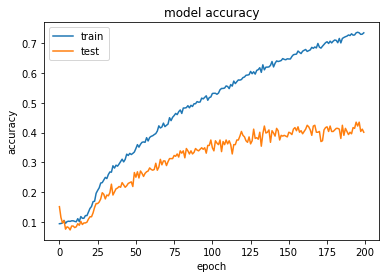

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Save model and weights
model_name = 'Emotion_Model1.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json1.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\User\Desktop\bits\project\final test\saved_models\Emotion_Model1.h5 


In [32]:
# loading json and model architecture 
json_file = open('model_json1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models\Emotion_Model1.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt =  tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
12/12 [==============================] - 4s 85ms/step - loss: 0.0539 - accuracy: 0.4010
accuracy: 40.10%


In [33]:
preds = loaded_model.predict(X_test, 
                         batch_size=32, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

12/12 [==============================] - 3s 89ms/step


array([12,  4,  7,  7, 13, 13,  7, 12, 11,  6, 11, 11, 11,  1, 10,  1,  4,
       10, 11,  0,  2,  6, 13,  8, 11,  5, 11,  6, 13,  7,  4,  1,  5, 11,
       10,  7,  7,  7, 11,  8,  7, 11,  1,  2,  4, 11,  4,  4,  6,  1,  8,
        7,  6, 11,  7, 11,  7, 11, 13, 11,  1, 12, 10,  4,  7,  8, 13,  7,
        7, 11, 12, 12,  4,  0,  1, 11, 11, 11, 12, 13,  7, 11,  1,  8, 13,
       13, 11,  8,  2,  7,  5, 13,  6,  8,  7, 11,  0, 11,  8,  6, 11, 12,
        0, 11, 11, 13,  8, 11,  8,  6, 12, 13,  8, 10,  7, 13,  1,  1, 11,
        1,  4,  8, 11,  7, 10,  2,  2,  8, 11,  7, 12, 11, 13,  1, 13,  1,
       11,  5,  2, 11, 11,  7, 12,  8, 13,  2,  7,  7,  4, 13,  7,  4,  5,
       11,  5,  7,  7, 11, 11,  7,  7,  7, 11,  4,  2,  6,  7, 11, 10,  4,
        7,  7,  1, 10,  5,  4,  7,  5, 10,  2, 13, 12,  1, 11, 10,  7, 10,
       11, 11, 11, 13,  5,  4,  1,  7, 13,  6, 10,  7,  2,  7, 11, 13,  8,
       11, 11,  4,  4,  5, 13,  5, 11,  5,  1,  4, 11, 13, 13,  7, 13,  7,
       11,  4,  7,  5,  4

In [34]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[160:180]

actualvalues  predictedvalues
160       male_angry       male_angry
161     male_neutral       male_angry
162     male_disgust     male_neutral
163   female_neutral   female_neutral
164      female_fear      female_fear
165  female_surprise  female_surprise
166     male_neutral       male_angry
167       male_happy     male_neutral
168    male_surprise       male_happy
169   female_neutral   female_neutral
170       male_angry       male_angry
171       male_happy       male_angry
172   female_disgust   female_disgust
173         male_sad       male_happy
174      female_fear       female_sad
175   female_neutral   female_neutral
176     male_disgust       male_angry
177   female_neutral       female_sad
178    male_surprise       male_happy
179     female_angry      female_fear

In [35]:
finaldf.to_csv('C:/Users/User/Desktop/bits/project/final test/Predictions1.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry               11
female_disgust             25
female_fear                19
female_neutral             32
female_sad                 19
female_surprise            20
male_angry                 59
male_disgust               20
male_happy                 24
male_neutral               84
male_sad                   30
male_surprise              41

In [36]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.4010416666666667


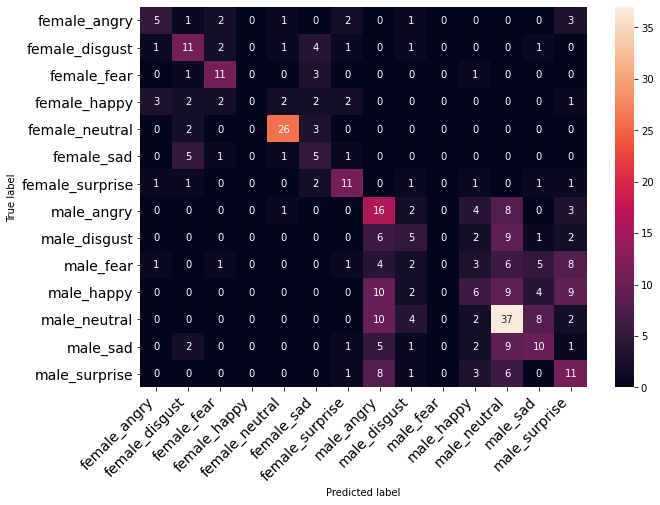

In [37]:
# Get the predictions file 
finaldf = pd.read_csv("C:/Users/User/Desktop/bits/project/final test/Predictions1.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [38]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.45      0.33      0.38        15
 female_disgust       0.44      0.50      0.47        22
    female_fear       0.58      0.69      0.63        16
   female_happy       0.00      0.00      0.00        14
 female_neutral       0.81      0.84      0.83        31
     female_sad       0.26      0.38      0.31        13
female_surprise       0.55      0.58      0.56        19
     male_angry       0.27      0.47      0.34        34
   male_disgust       0.25      0.20      0.22        25
      male_fear       0.00      0.00      0.00        31
     male_happy       0.25      0.15      0.19        40
   male_neutral       0.44      0.59      0.50        63
       male_sad       0.33      0.32      0.33        31
  male_surprise       0.27      0.37      0.31        30

       accuracy                           0.40       384
      macro avg       0.35      0.39      0.36       384
   weighted avg       0.36   